# CLUSTERING

In [167]:
# Import Libraries

from scipy.stats import zscore
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer, LabelBinarizer, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random as rd
from sklearn import metrics

# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile


## Data Preparation

Data Importance : Checkout the Error, noise, outliers, duplicate data, missing value, inconsistent data, timeliness, relevance, etc.

##### Sample Data

* Check the name and the data type for each column/feature
* Identify the predictor/feature/input and the target/label/output
* Look at missing values ( delete the records )

##### Check the Name and the Data Type for Each Column

In [168]:
# Reading the CSV Files
df = pd.read_csv("air_bnb.csv")
data = df.values

In [169]:
# Showing the dimention of air bnb dataset
df.shape

(22552, 16)

In [171]:
# Showing the correlation on each column
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.527680,0.006060,-0.018406,0.030992,-0.041777,-0.308877,0.250475,0.038248,-0.059485
host_id,0.527680,1.000000,0.007230,-0.047042,0.037808,-0.028396,-0.148577,0.203368,-0.048570,-0.009365
latitude,0.006060,0.007230,1.000000,-0.107228,0.002181,0.011863,0.037973,0.042594,0.039785,0.012116
longitude,-0.018406,-0.047042,-0.107228,1.000000,-0.042662,-0.026450,-0.020905,-0.041718,-0.044122,-0.086532
price,0.030992,0.037808,0.002181,-0.042662,1.000000,0.003626,-0.001235,0.010060,0.073244,0.105959
minimum_nights,-0.041777,-0.028396,0.011863,-0.026450,0.003626,1.000000,-0.021685,-0.047410,0.027285,0.099350
number_of_reviews,-0.308877,-0.148577,0.037973,-0.020905,-0.001235,-0.021685,1.000000,0.556738,0.085898,0.277621
reviews_per_month,0.250475,0.203368,0.042594,-0.041718,0.010060,-0.047410,0.556738,1.000000,0.121327,0.232556
calculated_host_listings_count,0.038248,-0.048570,0.039785,-0.044122,0.073244,0.027285,0.085898,0.121327,1.000000,0.252414
availability_365,-0.059485,-0.009365,0.012116,-0.086532,0.105959,0.099350,0.277621,0.232556,0.252414,1.000000


##### Correlation
* 0.0 - 0.2 : Weak
* 0.3 - 0.6 : Moderate
* 0.7 - 1.0 : Strong


##### Identify the Feature (Input) and the Label (Output)
---

| FEATURES        | DATA TYPE         | REASON  |
| ------------- |:-------------:| -----:|
| id      | integer | identitas unik dari suatu tempat tinggal dalam platform airbnb |
| host id      | integer | identitas unik dari pemilik suatu tempat tinggal dalam platform airbnb |
| price      | integer      |   harga dari sewa tempat |
| reviews_per_month      | integer      | ulasan dalam sebulan |
| neighbourhood & neighbourhood group | string      |    diperlukan untuk mengetahui lokasi tempat penyewaan |
| minimum_nights      | integer | sebagai persyaratan suatu tempat tinggal tertentu sebelum melakukan penyewaan |
| calculated_host_listrings_count      | integer | memberikan informasi kamar yang sudah dibook/dipesan oleh customer lain |
| availability_365      | integer      |   memberikan informasi ketersediaan kamar di tempat penyewaan tertentu |
| number_of_reviews | string      |  Diperlukan sebagai informasi untuk menyediakan kamar ternyaman sesuai reviewer |


---

| OUTPUT        | DATA TYPE         | REASON  |
| ------------- |:-------------:| -----:|
| id      | integer | identitas unik dari suatu tempat tinggal dalam platform airbnb |
| price      | integer      |   harga dari sewa tempat |


##### Find Out some Missing Values, then DROP IT :) 

In [172]:
# Quick check to see if we have any missing values at all
print(df.isnull().values.any())

True


In [173]:
# DataFrame Duplicate Checking and Drop if it's True
df.drop_duplicates(subset =["id", "room_type", "price"], keep = "first", inplace = True) 

In [174]:
# To view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


Minimum data is obtained 0 in the price column, definitely impossible.

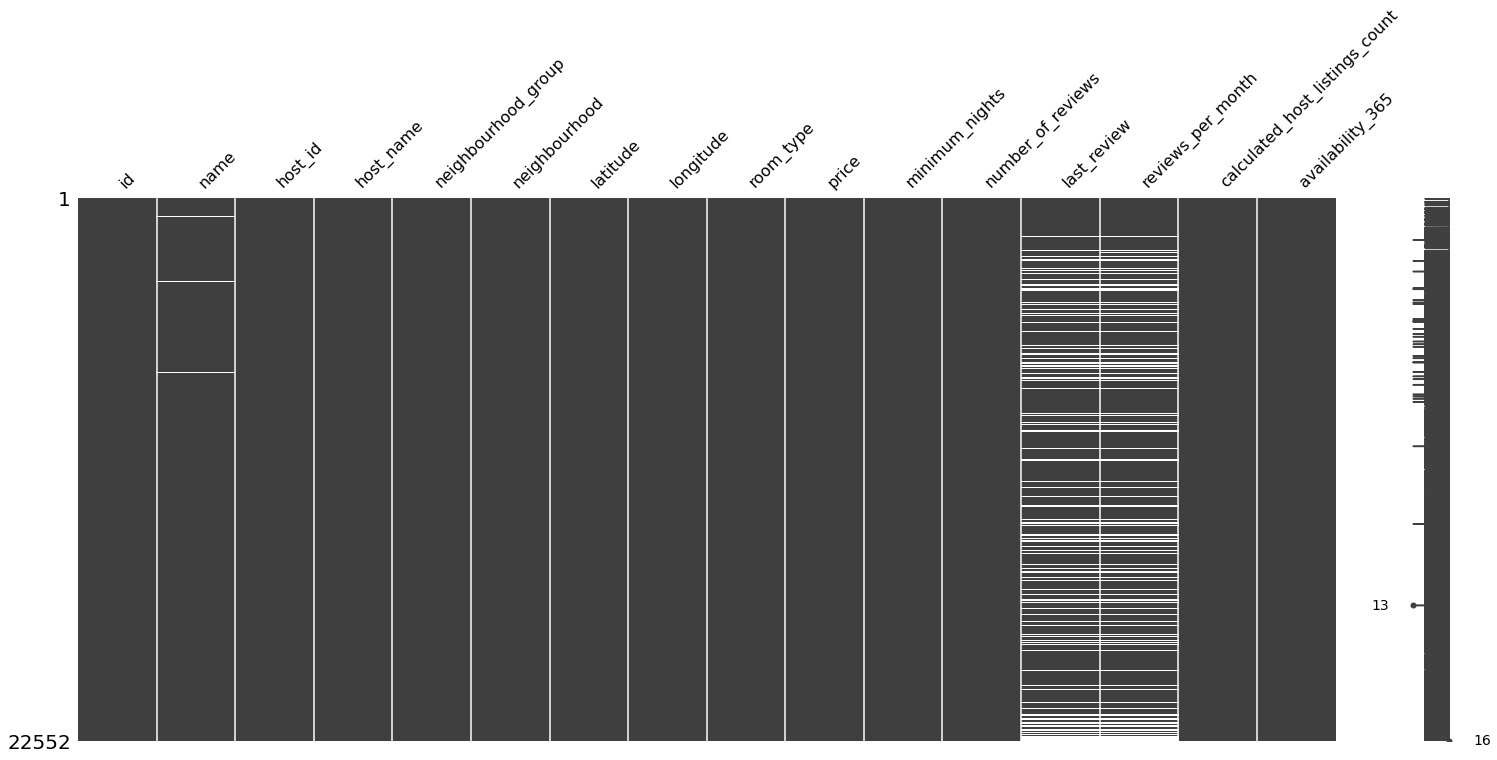

In [175]:
# Missing value visualization

msno.matrix(df)

Based on the final results on the missing value obtained from visualization, the data set consists of several columns that have numerical data categories and categorical data. Some columns will be dropped due to missing value and others. The following is a more complete explanation :

##### Columns Subset : 

Based on the results of visualization using the matrix can be seen quickly found the pattern of missing values that occur in :
* last_review  
* reviews_per_month

In that column, several data fields were found containing NaN, so that the last_review and reviews_per_month columns were removed.

Another argument for omitting some other columns is as follows:
* latitude & longitude : Menurut saya informasi lat & long tidak perlu, karena sudah ada informasi lokasi penyewaan melalui neighbourhood dan neighbourhood group.
* host_id & host_name : Setiap penyewaan memiliki informasi mengenai informasi id dan nama pemilik sewa penginapan. Informasi tersebut tidak terlalu penting karena yang terpenting adalah informasi mengenai tempat penginapan.
* name : terdapat field data yg tidak valid berupa (142 m² = 1530 ft² ♥LOFT♥ROOMS in Friedrichshain, *** modern-cozy-design apartment, 5 separate+ruhige Ferienwohnungen, etc)


In [176]:
# It removes the rows which contains NaN in either ‘Name’ or ‘Price’ column
df.dropna(how="any",subset=["id","name","host_id","host_name","neighbourhood_group",
                            "neighbourhood","room_type","price","minimum_nights","number_of_reviews",
                            "reviews_per_month","calculated_host_listings_count","availability_365"],inplace=True)

In [177]:
# Delete the data record caused by missing value
indexdrop = df[(df["price"]==0)].index
df.drop(indexdrop , inplace=True)

In [178]:
# Delete the data record caused by doesn't need it anymore
drop_cols = ["name", "host_name","latitude", "longitude", "last_review","host_id","neighbourhood_group","neighbourhood"]
df.drop(drop_cols, axis = 1, inplace = True)

##### Validation Process

In [179]:
df.shape

(18581, 8)

##### Outliers Detection

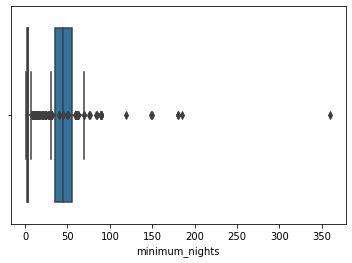

In [225]:
sns.boxplot(x=df["price"])

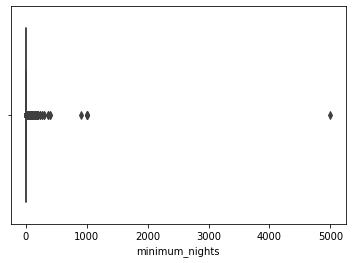

In [181]:
sns.boxplot(x=df["minimum_nights"])

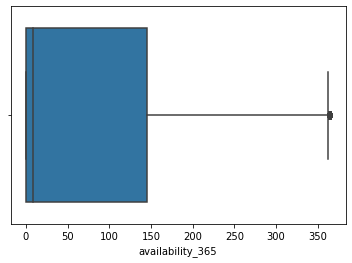

In [182]:
sns.boxplot(x=df["availability_365"])

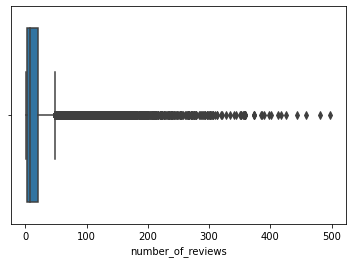

In [183]:
sns.boxplot(x=df["number_of_reviews"])

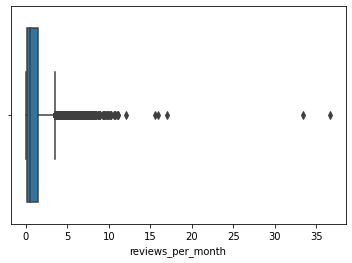

In [184]:
sns.boxplot(x=df["reviews_per_month"])

In [185]:
# Merge column between calculated and availability column for find out the total of the rooms.
sum_column = df["calculated_host_listings_count"] + df["availability_365"]
df["room_qty"] = sum_column

In [186]:
# Delete the data record caused by missing value 
drop_cols = ["calculated_host_listings_count", "availability_365"]
df.drop(drop_cols, axis = 1, inplace = True)

In [187]:
# Delete the data record caused by missing value
indexdrop = df[(df["room_qty"]==0)].index
df.drop(indexdrop , inplace=True)

##### Identifying Outlier with IQR

In [188]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                   14388687.00
price                      40.00
minimum_nights              2.00
number_of_reviews          18.00
reviews_per_month           1.33
room_qty                  148.00
dtype: float64


##### Filter Out the Outliers by Keeping Only Valid Values

Quantile-based Flooring and Capping Method && Trimming

In [189]:
# Drop any price columnn if not in interquartile range

Q1 = np.percentile(df["price"],25)
Q3 = np.percentile(df["price"],75)
IQR = Q3 - Q1

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR

idxUpper = df[(df["price"] > df["price"].quantile(0.75))].index
idxLower = df[(df["price"] < df["price"].quantile(0.25))].index

df.drop(idxUpper, inplace=True)
df.drop(idxLower, inplace=True)

In [190]:
# Drop any number of reviews columnn if not in interquartile range

Q1 = np.percentile(df["number_of_reviews"],25)
Q3 = np.percentile(df["number_of_reviews"],75)
IQR = Q3 - Q1

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR

idxUpper = df[(df["number_of_reviews"] > df["number_of_reviews"].quantile(0.75))].index
idxLower = df[(df["number_of_reviews"] < df["number_of_reviews"].quantile(0.25))].index

df.drop(idxUpper, inplace=True)
df.drop(idxLower, inplace=True)

In [191]:
# I need to drop reviews per month column due to has strong correlation with number of reviews column

Q1 = np.percentile(df["reviews_per_month"],25)
Q3 = np.percentile(df["reviews_per_month"],75)
IQR = Q3 - Q1

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR

idxUpper = df[(df["reviews_per_month"] > df["reviews_per_month"].quantile(0.75))].index
idxLower = df[(df["reviews_per_month"] < df["reviews_per_month"].quantile(0.25))].index

df.drop(idxUpper, inplace=True)
df.drop(idxLower, inplace=True)

In [192]:
# Recheck after drop any data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2810 entries, 91 to 20684
Data columns (total 7 columns):
id                   2810 non-null int64
room_type            2810 non-null object
price                2810 non-null int64
minimum_nights       2810 non-null int64
number_of_reviews    2810 non-null int64
reviews_per_month    2810 non-null float64
room_qty             2810 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 175.6+ KB


##### Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFAD26A448>]],
      dtype=object)

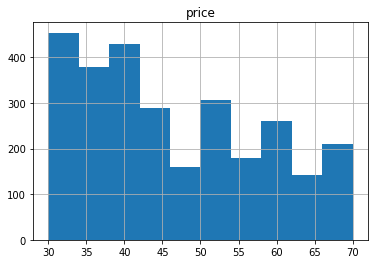

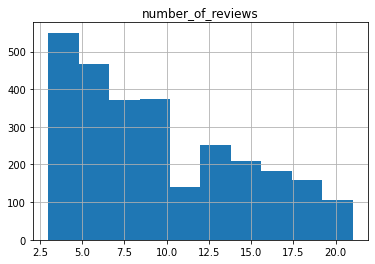

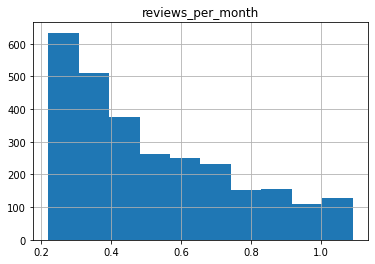

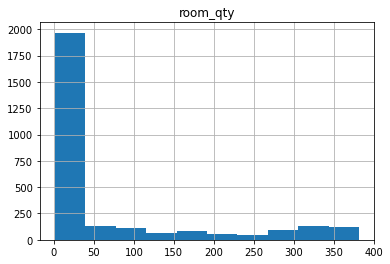

In [193]:
# Verify the distribution of each column 

df.hist("price")
df.hist("number_of_reviews")
df.hist("reviews_per_month")
df.hist("room_qty")

##### Feature Engineering
* Categorical Encoding using One Hot Encoding due to having non ordinal data only

In [194]:
# Transform 
df = pd.get_dummies(df, columns=["room_type"], prefix=["room type"])

#### Clustering 

In [195]:
# Storing the Feature 

X1 = df[['price']].values
X2 = df[['number_of_reviews']].values

In [196]:
# Construct the Elbow Method
from sklearn.cluster import KMeans # Saya hanya menggunakan libraries KMeans hanya untuk elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init="k-means++")
    y_kmeans = kmeanModel.fit_predict(df[["price","number_of_reviews"]])
    distortions.append(kmeanModel.inertia_)

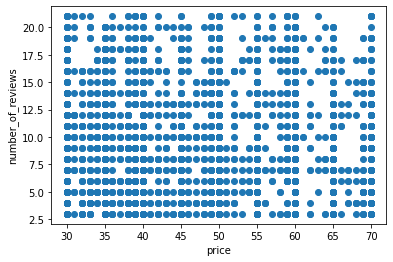

In [197]:
# Data Visualisation 

plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.scatter(X1,X2)

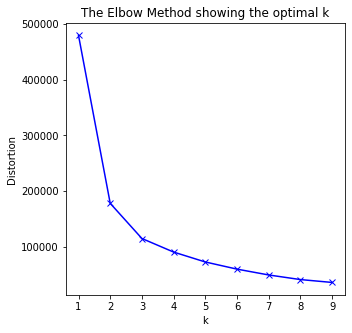

In [198]:
# Elbow Method Visualisation

plt.figure(figsize=(5,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We often know the value of K. In that case we use the value of K. Else we use the Elbow Method

##### K-Means Step
* Step 1 - Pick K random points as cluster centers called centroids.
* Step 2 - Assign each Xi to nearest cluster by calculating its distance to each centroid.
* Step 3 - Find new cluster center by taking the average of the assigned points.
* Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

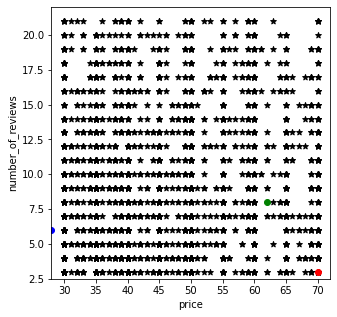

In [199]:
### STEP 1

k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(28, 72), np.random.randint(2.5, 22)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df["price"], df["number_of_reviews"], color='k',marker='*')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(28, 72)
plt.ylim(2.5, 22)
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.show()

         id  price  minimum_nights  number_of_reviews  reviews_per_month  \
91   128827     59               2                 16               0.37   
114  169907     30               1                 13               0.32   
133  180440     39              60                 18               0.23   
183  220445     60              30                 16               0.24   
198  231220     30              60                 18               0.23   

     room_qty  room type_Entire home/apt  room type_Private room  \
91        303                          1                       0   
114         1                          0                       1   
133       203                          1                       0   
183       277                          1                       0   
198       222                          1                       0   

     room type_Shared room  distance_from_1  distance_from_2  distance_from_3  \
91                       0        17.029386         8

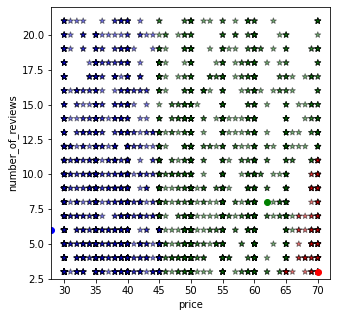

In [200]:
### STEP 2

## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['price'] - centroids[i][0]) ** 2
                + (df['number_of_reviews'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['price'], df['number_of_reviews'], color=df['color'], alpha=0.5, edgecolor='k',marker='*')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(28, 72)
plt.ylim(2.5, 22)
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.show()

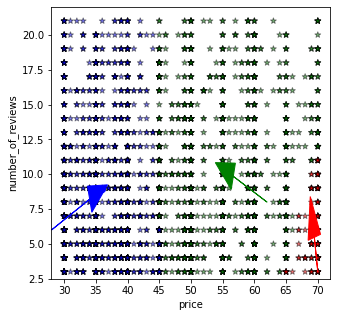

In [201]:
### STEP 3

# Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['price'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['number_of_reviews'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['price'], df['number_of_reviews'], color=df['color'], alpha=0.5, edgecolor='k',marker='*')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(28, 72)
plt.ylim(2.5, 22)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.show()

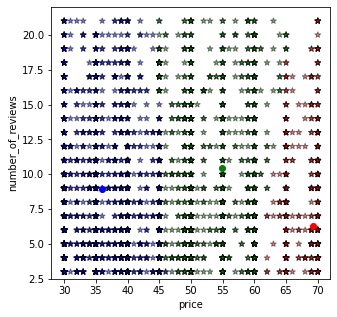

In [202]:
### STEP 4

# Repeat Assigment Stage
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['price'], df['number_of_reviews'], color=df['color'], alpha=0.5, edgecolor='k',marker='*')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(28, 72)
plt.ylim(2.5, 22)
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.show()

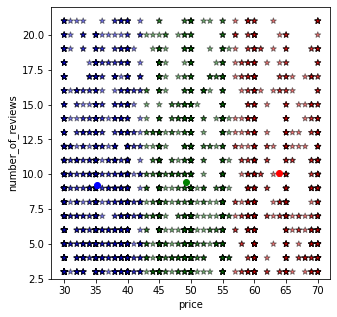

In [203]:
### STEP 4

# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['price'], df['number_of_reviews'], color=df['color'], alpha=0.5, edgecolor='k',marker='*')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(28, 72)
plt.ylim(2.5, 22)
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.show()

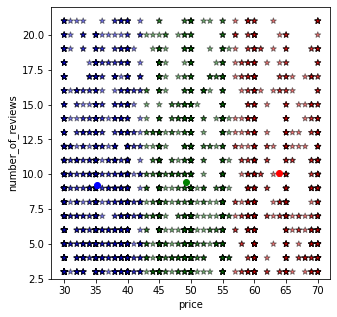

In [204]:
### STEP 4

## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['price'], df['number_of_reviews'], color=df['color'], alpha=0.5, edgecolor='k',marker="*")
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(28, 72)
plt.ylim(2.5, 22)
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.show()

In [205]:
kmeans = KMeans(n_clusters=3)
data = df[['price', 'number_of_reviews']]
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [206]:
# Create the label
labels = kmeans.predict(data)
# Centroids Coordinate
centroids = kmeans.cluster_centers_

In [207]:
drop_cols = ["distance_from_1", "distance_from_2","distance_from_3","closest","color"]
df.drop(drop_cols, axis = 1, inplace = True)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2810 entries, 91 to 20684
Data columns (total 2 columns):
price                2810 non-null int64
number_of_reviews    2810 non-null int64
dtypes: int64(2)
memory usage: 65.9 KB


### Labelling the Data

In [209]:
mapping_dict = {0:'Recommended', 1:'Moderate', 2:'Not Recommended'}

In [210]:
mapped_predictions = [mapping_dict[i] for i in labels]

In [211]:
data["label"] = mapped_predictions
data.head(10)

C:\Users\alief\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,number_of_reviews,label
91,59,16,Moderate
114,30,13,Recommended
133,39,18,Recommended
183,60,16,Moderate
198,30,18,Recommended
203,55,15,Not Recommended
247,59,18,Moderate
279,45,3,Not Recommended
297,46,16,Not Recommended
306,64,18,Moderate


# Classification

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

##### Data Splitting
* Data Training (80%)
* Data Testing (20%)

In [223]:
#split dataset in features and target variable
feature_cols = ['price', 'number_of_reviews']
X = data[feature_cols] # Features
y = data.label # Target variable

In [224]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### DECISION TREE 

In [215]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct? This is use for evaluating model
accDT = metrics.accuracy_score(y_test,y_pred)

#####  SVM

In [216]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
accSVM = metrics.accuracy_score(y_test, y_pred)

#####  Naive Bayes

In [217]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accNB = metrics.accuracy_score(y_test, y_pred)

##### K-Nearest Neighbours

In [218]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accKNN = metrics.accuracy_score(y_test, y_pred)

# Evaluation

In [219]:
print("===================================")
print("HASIL AKURASI DENGAN BEBERAPA MODEL")
print("===================================")
print("Decision Tree : ",accDT)
print("     SVM      : ",accSVM)
print("  Naive Bayes : ",accNB)
print("     KNN      : ",accKNN)

HASIL AKURASI DENGAN BEBERAPA MODEL
Decision Tree :  1.0
     SVM      :  1.0
  Naive Bayes :  0.998220640569395
     KNN      :  0.9928825622775801


# Export

In [221]:
data.to_csv(r'F:\Alief\TUGAS\telkom university\Mata Kuliah\SEMESTER 6\machine learning\tubes\Export.csv', index = False)